In [1]:
#import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

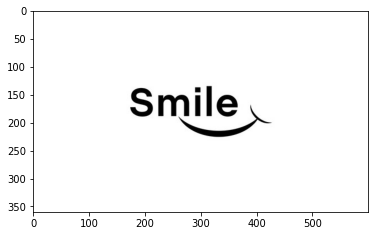

In [2]:
img = cv2.imread('smile.jpg')
img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)

In [3]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

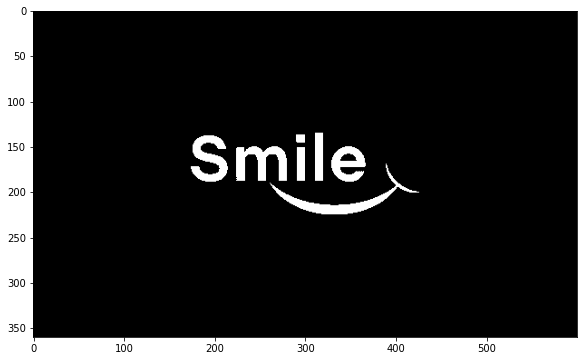

In [4]:
ret, binary_img = cv2.threshold(gray_img, 127, 255, type=cv2.THRESH_BINARY_INV)
plt.figure(figsize=(14, 6))
plt.imshow(binary_img, cmap='gray')
plt.show()

In [5]:
kernel = np.ones((3, 3), dtype=np.uint8) * 255
kernel

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [6]:
set(list(binary_img.flatten()))

{0, 255}

In [7]:
binary_img.min()

0

In [26]:
def get_dialation(img, kernel, iterations=1):
    def dilate(src, kernel):
        dst = np.zeros(src.shape, dtype=np.uint8)
        for i in range(1,src.shape[0]-1):
            for j in range(1,src.shape[1]-1):
                if src[i, j] == 255:
                    dst[i-1:i+2, j-1:j+2] = kernel
        return dst
    for i in range(iterations):
        img = dilate(img, kernel)
    
    return img

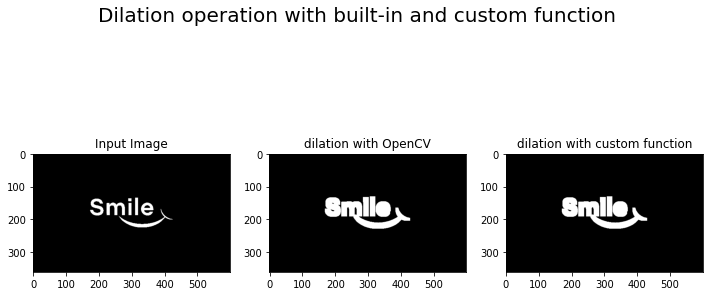

In [63]:
iterations=4
dilation_img = cv2.dilate(binary_img, kernel=kernel, iterations=iterations)
dilation_img2 = get_dialation(binary_img, kernel=kernel, iterations=iterations)
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(binary_img, cmap='gray')
ax[0].set_title('Input Image')
ax[1].imshow(dilation_img, cmap='gray')
ax[1].set_title('dilation with OpenCV')
ax[2].imshow(dilation_img2, cmap='gray')
ax[2].set_title('dilation with custom function')
plt.suptitle('Dilation operation with built-in and custom function', fontsize=20)
plt.show()

In [10]:
import copy

In [11]:
def dilate_morph(img, kernel, iterations):
        
    def dilate_with_numpy(input_img, kernel):
        img = copy.deepcopy(input_img)
        src = np.pad(img, kernel.shape[0]-2)
        
        for i in range(src.shape[0]-2):
            for j in range(src.shape[1]-2):
                if (src[i:i+kernel.shape[0], j:j+kernel.shape[1]] == kernel).any():
                    img[i,j] = 255

        
        return img

    for i in range(iterations):
        img = dilate_with_numpy(img, kernel)

    return img



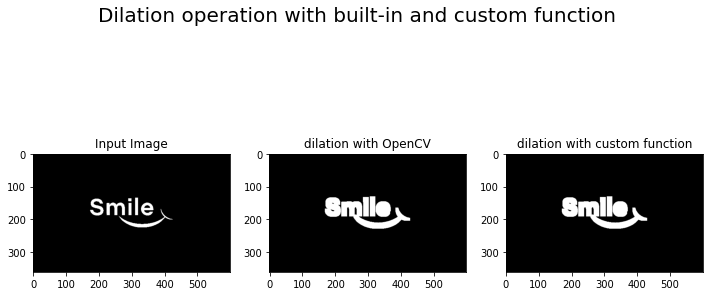

In [61]:
iterations=4
dilation_img = cv2.dilate(binary_img, kernel=kernel, iterations=iterations)
dilation_img2 = dilate_morph(img=binary_img, kernel=kernel, iterations=iterations)
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(binary_img, cmap='gray')
ax[0].set_title('Input Image')
ax[1].imshow(dilation_img, cmap='gray')
ax[1].set_title('dilation with OpenCV')
ax[2].imshow(dilation_img2, cmap='gray')
ax[2].set_title('dilation with custom function')
plt.suptitle('Dilation operation with built-in and custom function', fontsize=20)
plt.show()

In [31]:
def get_erosion(img, kernel, iterations=1):
    def erode(src, kernel):
        dst = np.ones((src.shape[0]+1, src.shape[1]+1), dtype=np.uint8)
        for i in range(1,src.shape[0]):
            for j in range(1,src.shape[1]):
                if src[i, j] == 0:
                    dst[i-1:i+2, j-1:j+2] = np.zeros(kernel.shape)
        return dst
    for i in range(iterations):
        img = erode(img, kernel)

    return img

In [32]:
kernel.shape

(3, 3)

uint8


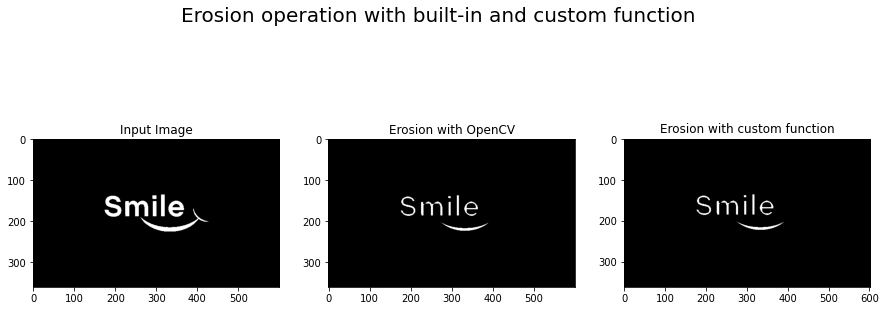

In [60]:
iterations=2
erosion_img = cv2.erode(binary_img, kernel=kernel, iterations=iterations)
erosion_img2 = get_erosion(img=binary_img, kernel=kernel, iterations=iterations)
print(erosion_img2.dtype)
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].imshow(binary_img, cmap='gray')
ax[0].set_title('Input Image')
ax[1].imshow(erosion_img, cmap='gray')
ax[1].set_title('Erosion with OpenCV')
ax[2].imshow(erosion_img2, cmap='gray')
ax[2].set_title('Erosion with custom function')
plt.suptitle('Erosion operation with built-in and custom function', fontsize=20)
plt.show()

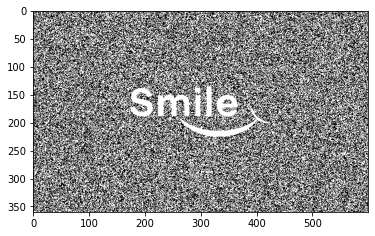

In [22]:
white_noise = (np.random.randint(low=0, high=2, size=binary_img.shape) * 255).astype('uint8')
binary_with_noise_img = binary_img + white_noise
plt.imshow(binary_with_noise_img, cmap='gray')

In [50]:
def opening(img, kernel):

    """
    opening is nothing but erosion followed by delation
    """
    erosion_img = get_erosion(img, kernel, 1)
    erosion_followed_by_delation = dilate_morph(erosion_img, kernel, 1)
    return erosion_followed_by_delation

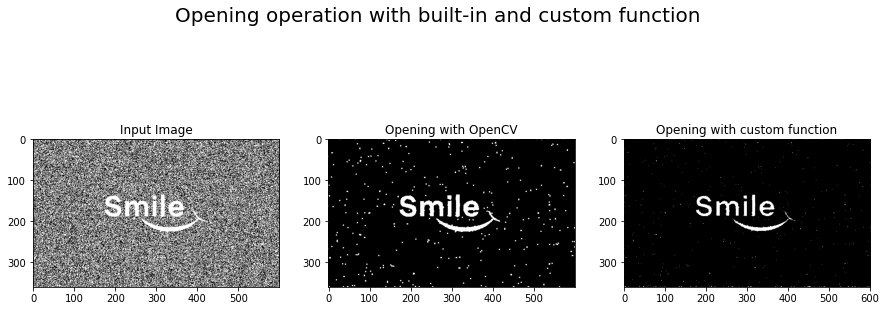

In [59]:
opening_img = cv2.morphologyEx(binary_with_noise_img, cv2.MORPH_OPEN, kernel)
opening_img2 = opening(binary_with_noise_img, kernel)
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].imshow(binary_with_noise_img, cmap='gray')
ax[0].set_title('Input Image')
ax[1].imshow(opening_img, cmap='gray')
ax[1].set_title('Opening with OpenCV')
ax[2].imshow(opening_img2, cmap='gray')
ax[2].set_title('Opening with custom function')
plt.suptitle('Opening operation with built-in and custom function', fontsize=20)
plt.show()

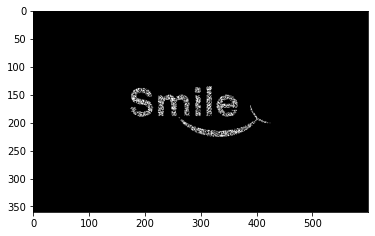

In [53]:
black_noise = (np.random.randint(low=0, high=2, size=binary_img.shape))
black_noise = black_noise * -255
black_noise_img = binary_img + black_noise
black_noise_img[black_noise_img == -255] = 0
black_noise_img = black_noise_img.astype('uint8')
plt.imshow(black_noise_img, cmap='gray')

In [55]:
def closing(img, kernel):
    """ 
    closing is nothing but delation followed by erosion
    """
    delation_img = dilate_morph(img, kernel, 1)
    delation_followed_by_erosion = get_erosion(delation_img, kernel, 1)
    return delation_followed_by_erosion

    

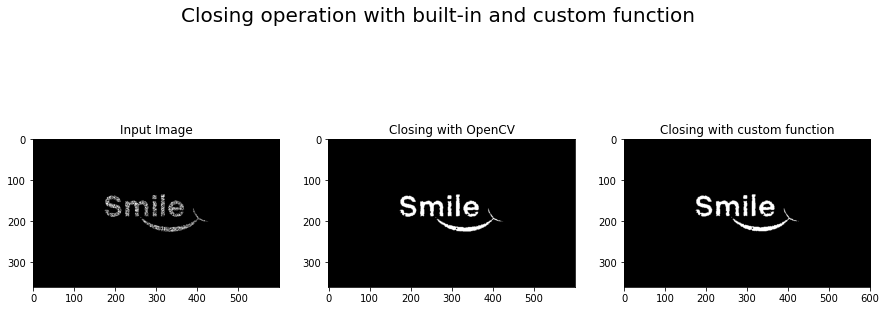

In [58]:
closing_img = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
closing_img2 = closing(black_noise_img, kernel)
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].imshow(black_noise_img, cmap='gray')
ax[0].set_title('Input Image')
ax[1].imshow(closing_img, cmap='gray')
ax[1].set_title('Closing with OpenCV')
ax[2].imshow(closing_img2, cmap='gray')
ax[2].set_title('Closing with custom function')
plt.suptitle('Closing operation with built-in and custom function', fontsize=20)
plt.show()